In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
id_period_mapping = pd.read_csv("./data/id_period_mapping.csv")
test_data["period"] = id_period_mapping["period"]
sample_submission = pd.read_csv("./data/sample_submit.csv", header=None)

test_data.index = test_data["data_id"]

In [3]:
test_data["period"].unique()

array(['test7', 'test9', 'test2', 'test1', 'test6', 'test4', 'test10',
       'test3', 'test5', 'test8'], dtype=object)

In [4]:
mask = (train_data["period"] == "train9") | (train_data["period"] == "train6") | (train_data["period"] == "train4") | (train_data["period"] == "train7") | \
(train_data["period"] == "train5") | (train_data["period"] == "train3") | (train_data["period"] == "train1") | (train_data["period"] == "train14") | \
(train_data["period"] == "train13") | (train_data["period"] == "train11") | (train_data["period"] == "train10") | (train_data["period"] == "train2") | \
(train_data["period"] == "train12") | (train_data["period"] == "train10") | (train_data["period"] == "train14")
train_data = train_data[mask] 


In [5]:
train_y = train_data.iloc[:, -1]

In [6]:
l = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]
dfx = pd.DataFrame()
#for i in range(1, 15):
for i in l:
    dfi = train_data[train_data.period == "train{}".format(i)].iloc[:, 2:90]
    dfx = dfx.append((dfi - dfi.mean()) / dfi.std())
train_X = dfx

In [7]:
dfx = pd.DataFrame()
for i in range(1, 11):
    dfi = test_data[test_data.period == "test{}".format(i)].iloc[:, 1:-1]
    dfx = dfx.append((dfi - dfi.mean()) / dfi.std())
test_X = dfx
test_X = test_X.loc[test_data.index]

In [9]:
#feature_select = ["c12", "c80", "c48", "c76"] #0.69347
#feature_select = ["c12", "c80", "c48", "c76", "c81"] #0.69260
#feature_select = ["c12", "c80", "c48", "c76", "c81", "c68"] #
feature_select = ["c12", "c80", "c48", "c81"] #  0.69230
#feature_select = ["c12", "c76", "c48", "c81"] #  80→76 0.69266
#feature_select = ["c12", "c80", "c48", "c81", "c58"] # 0.69263
#feature_select = ["c12", "c80", "c48"] # 0.69241
#feature_select = ["c12", "c80"] 
# feature_select = ["c12"]
#feature_select = ["c12", "c80", "c48", "c76", "c81", "c68", "c58", "c56", "c27", "c67"]　# 0.69472
train_X_select = train_X[feature_select]
train_X_select["bias"] = 1
test_X_select = test_X[feature_select]
test_X_select["bias"] = 1

w = np.linalg.inv(train_X_select.T.dot(train_X_select)).dot(train_X_select.T).dot(train_y)

# train_X_select["pred"] = w.dot(train_X_select.T)
# test_X_select["pred"] = w.dot(test_X_select.T)






/Users/Hirono/.pyenv/versions/anaconda2-5.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Hirono/.pyenv/versions/anaconda2-5.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
hub = linear_model.HuberRegressor()
hub.fit(train_X_select, train_y)
y_pred=hub.predict(test_X_select)

提出用

In [20]:
hoge = (sample_submission[1] - sample_submission[1].mean()) / 2 + sample_submission[1].mean()

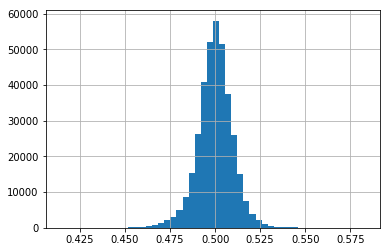

In [21]:
hoge.hist(bins=50)

In [24]:
hoge.to_csv("hoge.csv", index=0)

In [17]:
sample_submission[1].var()

0.0004097405302663154

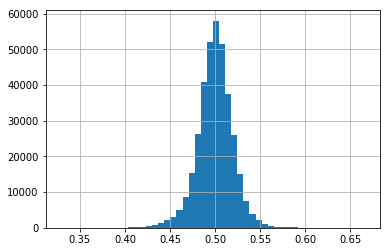

In [13]:
sample_submission[1].hist(bins=50)

In [12]:
sample_submission[1].max()

0.66647767447132844

In [11]:
sample_submission[1].min()

0.32882895424872782

In [25]:
sample_submission[1] = hoge
sample_submission.to_csv("result_2.csv", index=0)

In [10]:
# 線形回帰
sample_submission[1] = w.dot(test_X_select.T)
sample_submission.to_csv("result.csv", index=0)

In [28]:
sample_submission[1] = y_pred
sample_submission.to_csv("result_feature3.csv", index=0)

In [10]:
test_y = RF.predict(test_X_select)
sample_submission[1] = test_y
sample_submission.to_csv("result.csv", index=0)

In [10]:
test_y = RF.predict_proba(test_X_select)
sample_submission[1] = test_y[:, 1]
sample_submission.to_csv("result.csv", index=0)

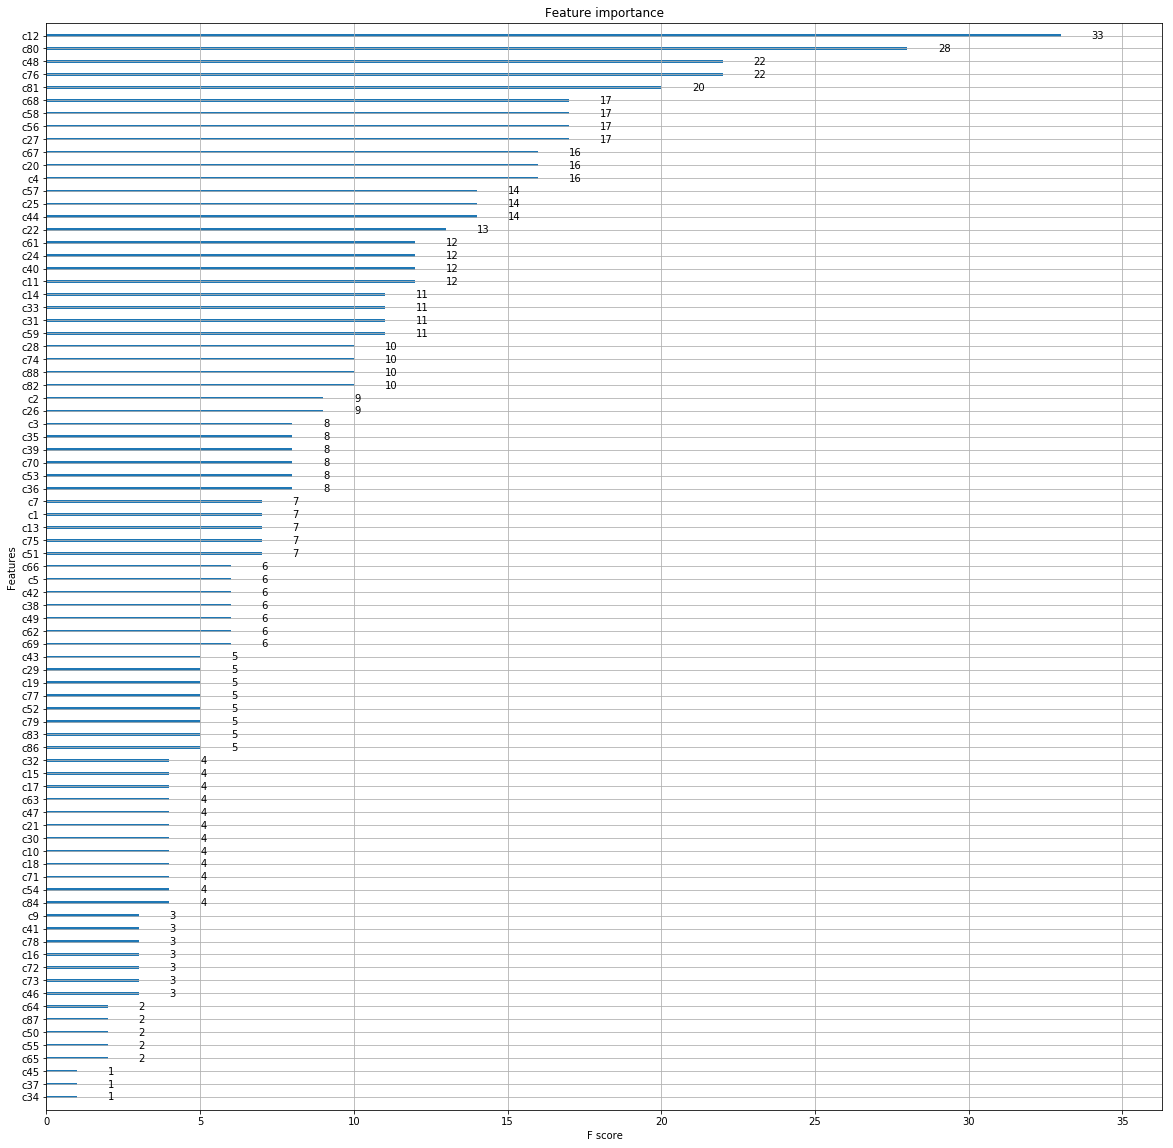

In [5]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_importance(RF, ax=ax)
plt.show()